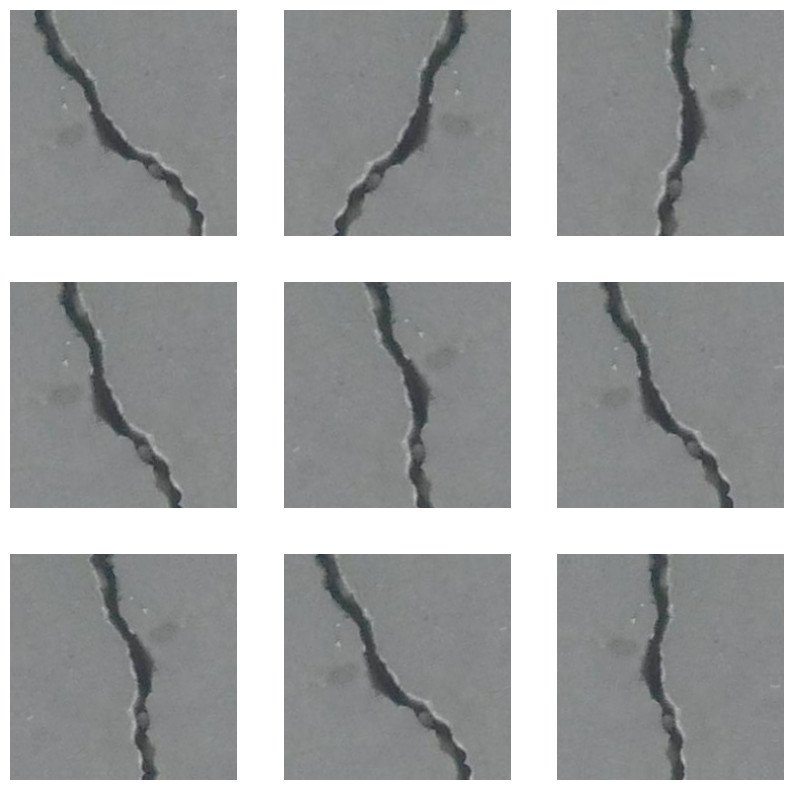

In [7]:
# train base model augmentation logic
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Visualize
image_path = "data/Positive/00001.jpg"  
img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_img = data_augmentation(img_array)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_img[0].numpy().astype("uint8"))
    plt.axis("off")
plt.show()

In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    data_augmentation,             
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
from module.dataloader import create_generators

data_dir = "data/"
train_gen, val_gen = create_generators(
    data_dir,
    img_size=(224, 224),    
    batch_size=16,
    val_split=0.2,
    augment=False           
)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [16]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    steps_per_epoch=5,       
    validation_steps=5
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9898 - loss: 0.0365 - val_accuracy: 0.9750 - val_loss: 0.0724
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 737ms/step - accuracy: 0.9741 - loss: 0.0619 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 836ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 3.2412e-04
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 880ms/step - accuracy: 1.0000 - loss: 2.2066e-04 - val_accuracy: 0.9875 - val_loss: 0.1077
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 760ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9875 - val_loss: 0.1319
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 771ms/step - accuracy: 1.0000 - loss: 3.8210e-04 - val_accuracy: 1.0000 - val_loss: 4.8308e-05
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 728ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9875 - val_loss: 0.0180
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 733ms/step - accuracy: 0.9932 - loss: 0.0121 - val_accuracy: 0.987

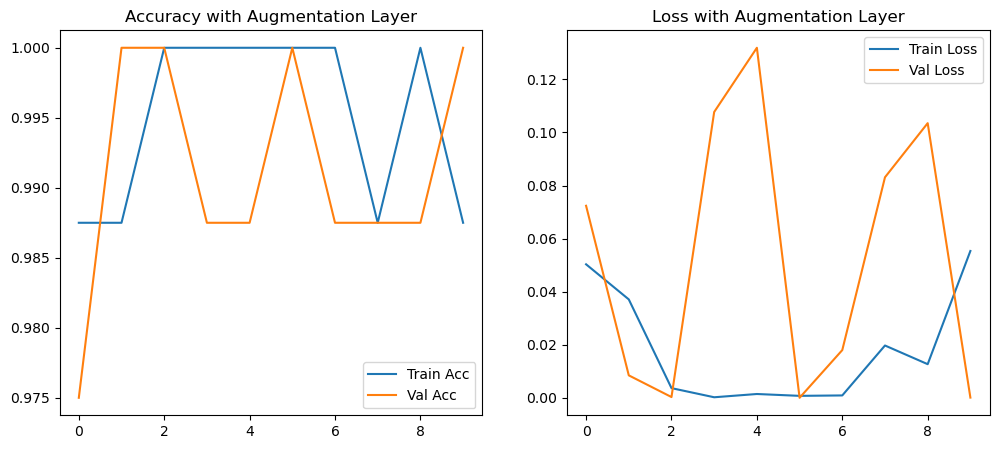

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy with Augmentation Layer')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss with Augmentation Layer')

plt.show()

In [19]:
model.save("models/augbasemodel.keras")

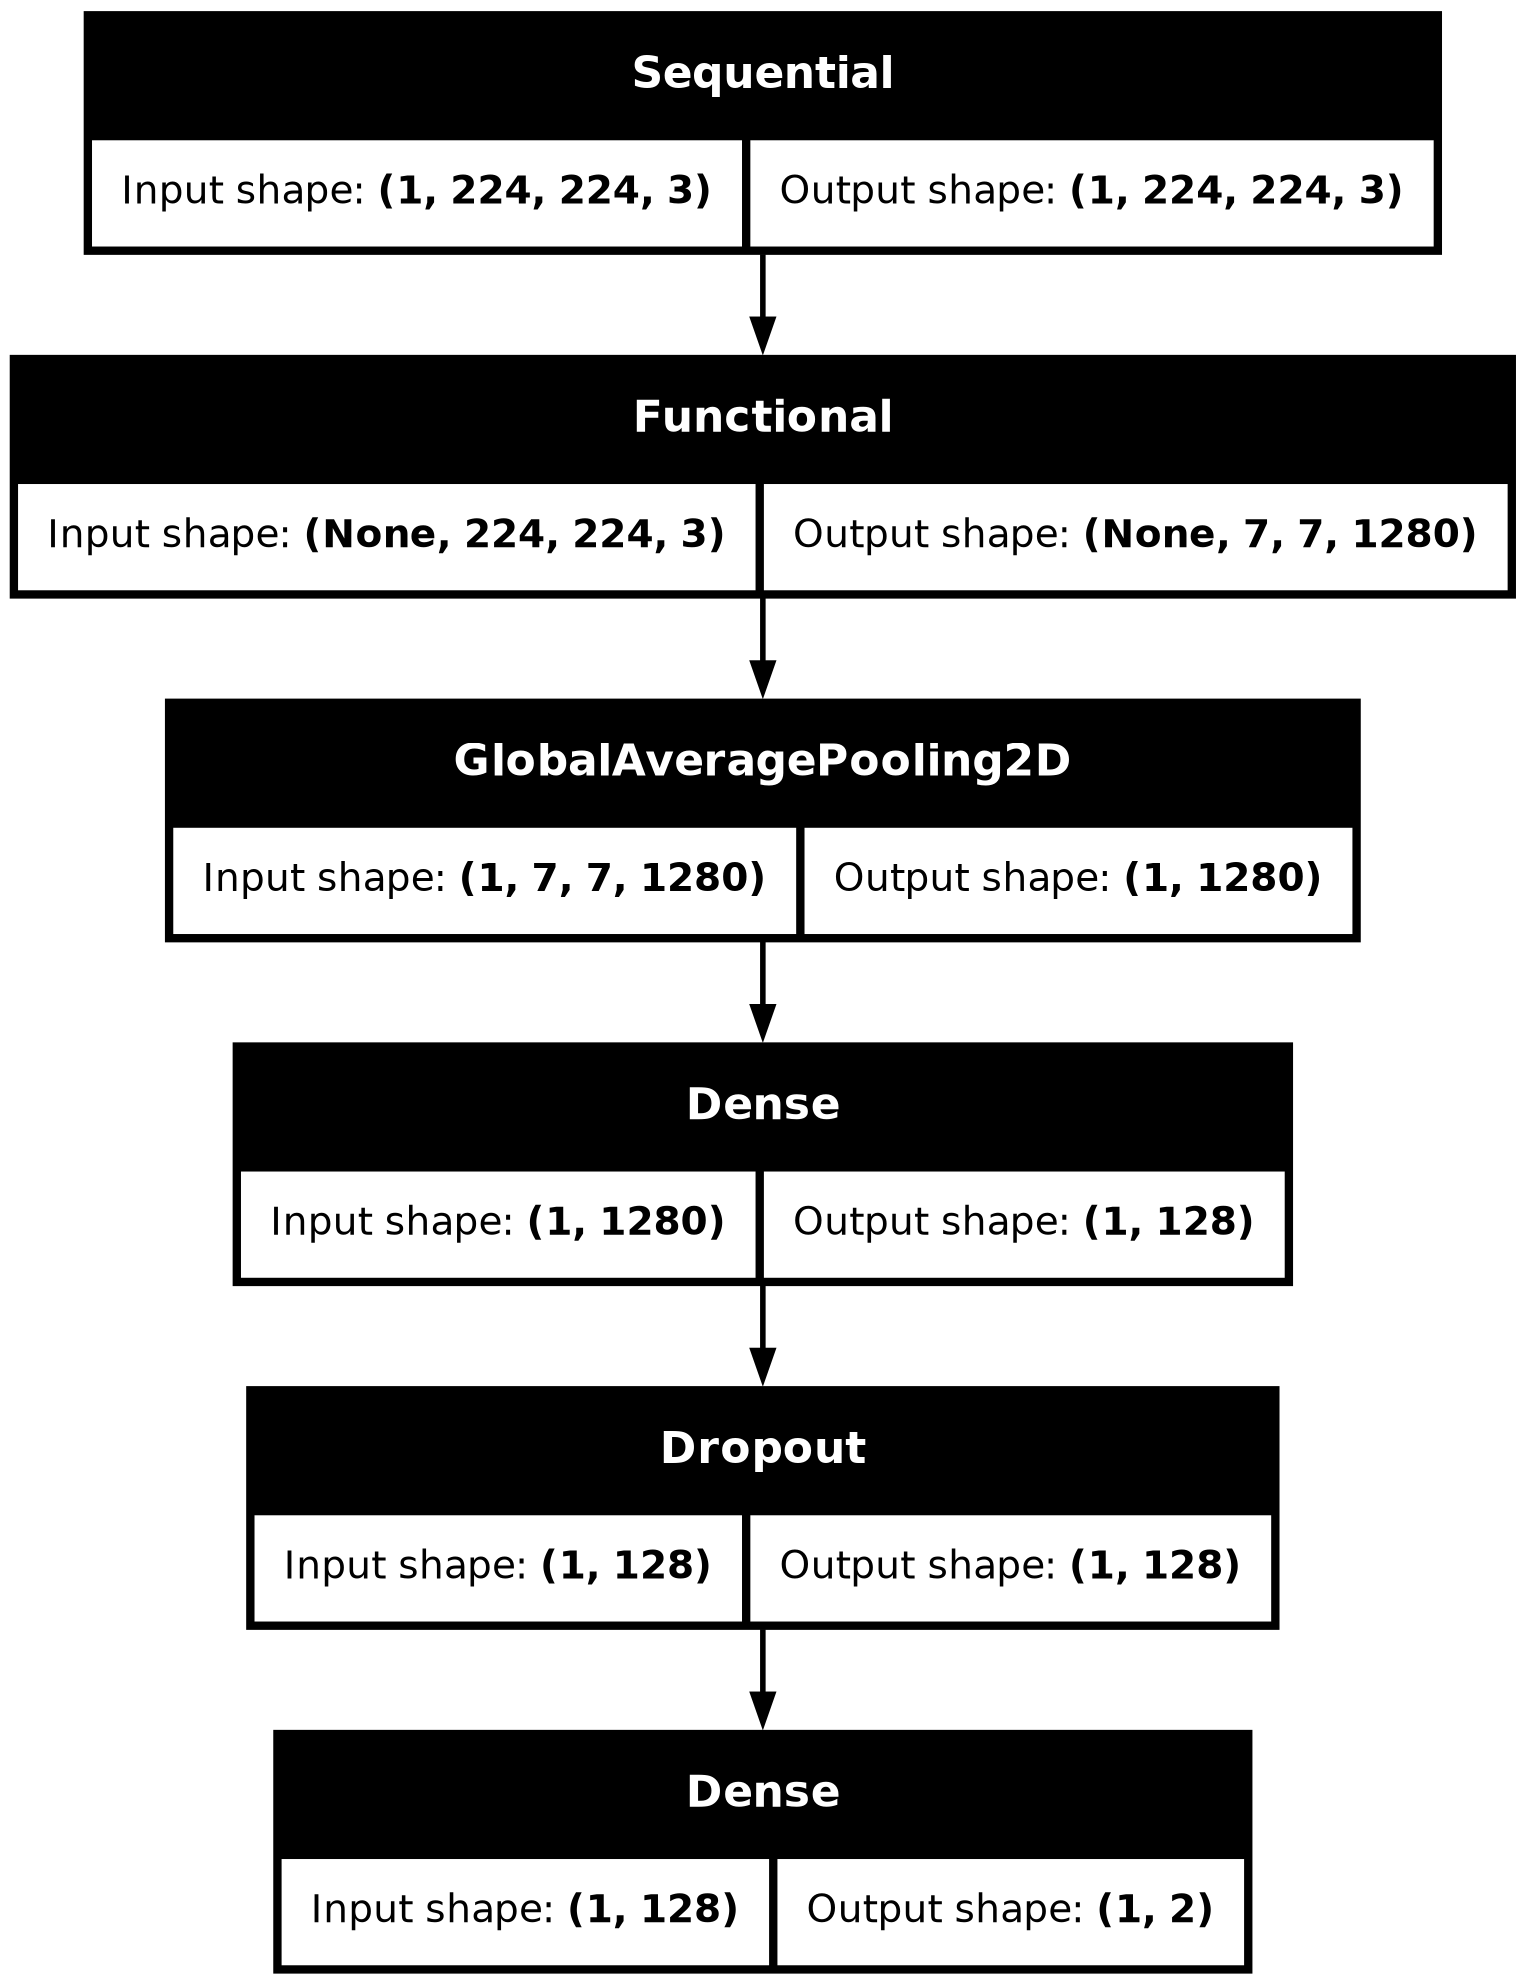

In [20]:
from tensorflow import keras
from IPython.display import Image, display

# Output model architecture
keras.utils.plot_model(model, show_shapes=True, to_file="models/augbasemodel.png")
display(Image(filename="models/augbasemodel.png", width=450))  

In [ ]:
# end of base model build with image augmentation logic passes.
# validation doesn't look accurate or trace training passes